# Neural Networks

## Pros

- Best performing class of algorithms for AI.
- Use in both regression and classification.

## Cons

- Requires expensive compute time and resources to train models.

## References

1. Hands-On Machine Learning: Chapter 10 - Introduction to Artificial Neural Networks, Chapter 11 - Training Deep Neural Nets
1. Deep Learning from Scratch
1. Programming PyTorch for Deep Learning
1. Deep Learning with Python
1. Fundamentals of Deep Learning
1. How to build your own neural network from scratch using Python: [https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6](https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6)
1. Creating a neural network from scratch in Python: [https://stackabuse.com/creating-a-neural-network-from-scratch-in-python/](https://stackabuse.com/creating-a-neural-network-from-scratch-in-python/)
1. How to use data scaling to improve deep learning model stability and performance [https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/](https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/)
1. Wikipedia: Artificial Neural Network [https://en.wikipedia.org/wiki/Artificial_neural_network](https://en.wikipedia.org/wiki/Artificial_neural_network)
1. StatQuest: Artificial Neural Networks: [https://www.youtube.com/playlist?list=PLblh5JKOoLUIxGDQs4LFFD--41Vzf-ME1](https://www.youtube.com/playlist?list=PLblh5JKOoLUIxGDQs4LFFD--41Vzf-ME1)

In [1]:
import numpy as np
import pandas as pd
from scipy.special import erf
from matplotlib import pyplot as plt
import seaborn as sns
from yellowbrick import classifier as ybc
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras

# Basics of Neural Networks

## Perceptron

A **perceptron** is based off a biological neuron. Invented in 1958 by Frank Rosenblatt as an abstraction from a biological neuron. Perceptrons take input (dendrite), process it with a function (cellular processes), and output new information (axon).

Minsky and Papert published the book *Perceptrons* in 1969. This book suggested limitations to what perceptrons could do and caused the *AI Winter* until other advancements could be made.

## Mathematical model of a Perceptron

$$
    \hat{y} = \sum_{i=1}^{n}x_iW_i + b_i
$$

$x$ is a **tensor** of information (an $n$-dimensional matrix of data).

$w$ applies a weight to $x$ to quantify how much information that input should contribute.

$b$ is the **bias** value and is used to offset weights. Bias can be thought of as an offset so that the weight has to overcome a certain threshold in order to contribute information.

A single perceptron is not enough to learn complicated systems.

# The Neural Network

A **neural network** is made of multiple layers and multiple perceptrons, represented as a graph with nodes and vertices. The **width** of a network is how many perceptrons in a layer and the **depth** is how many layers in the network.

Can be used to approximate any convex continuous function ([Universal Approximation Theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem)).

## Input Layer

The **input layer** is made of the dataset features. The outputs are fed into one or more hidden layers.

## Hidden Layers

One or more **hidden layers** are calculated using **activation functions**. Each hidden layer feeds into another hidden layer or the output layer. It is difficult to analyze what a single perceptron is doing and this makes up the "black box" attribute of neural networks.

Perceptrons in hidden layers include an **activation function**.

## Output Layer

The resulting output of predictions. There can be more than one perceptron in the output layer (multi-class classification neural networks).

# Cost Functions, Gradient Descent, and Backpropagation

We need to take the estimated outputs of the network and compare them to the ground truth values.

The **cost function** (or **loss function**) measure how much predictions are off from actual values.

$$
    C(W,B,S^r,E^r)
$$

$W$: weights, $B$: biases, $S^r$: input of a single sample, $E^r$: output of single training sample.

## Quadratic Cost Function
$$
    C = \frac{1}{2}\sum_{i}(y_i - \hat{y}_i)^2
$$

$a^L$: activation function output of $L$ layer. The predicted output. **Mean squared error** is a quadratic loss function.

## Cross-Entropy Loss Function

For binary classification:

$$
    C = -y\log(p) + (1 - y)\log(1 - p))
$$

For multi-class classification:

$$
    C = -\sum_{c=1}^{M}y_{o,c}\log(p_{o,c})
$$

## Gradient Descent

Solving the cost function is finding $C^\prime = 0$. However, because these are complex calculations, there may be multiple local minima equal to $0$. **Gradient descent** is used to update weights and biases in a step-wise manner to find the global minima within a tolerance.

The **learning rate** is the size of step.

**Adaptive gradient descent** changes the size of steps proportionally with the slope of descent.

## Backpropagation

**Backpropagation** is to use the gradient to go back through the neural network to adjust weights and biases to minimize the error vector on the output layer.

The **delta rule** is the partial derivative of the cost function used to evaluate the gradient.

$$
    \Delta w_k = -\epsilon\frac{\delta E}{\delta w_k} = -\epsilon \frac{\delta}{\delta w_k}(\frac{1}{2}\sum_i(y_i - \hat{y}_i)^2) = \sum_i\epsilon(y_i - \hat{y}_i)\frac{\delta y_i}{\delta w_k} = \sum_i\epsilon x_k(y_i - \hat{y}_i)
$$

## Stochastic and Mini-Batch Gradient Descent

$$
    \Delta w_{ij} = -\Sigma_{k \in \text{minibatch}}\epsilon y_i^{(k)}y_j^{(i)}(1 - y_j^{(k)}\frac{\delta E^{(k)}}{\delta y_j^{(k)}}
$$

# Softmax

Calculates the probabilities distribution of the event over $J$ different events.

$$
    f_i(x) = \frac{e^{x_i}}{\sum_{j=1}^{J}e^{x_j}}
$$

# Activation Functions

**Activation functions** create an boundary range from the weighted and biased tensor.

The derivative of an activation function is used in backpropagation.

$$
    z = wx + b
$$

In [2]:
X = np.arange(-5, 5.01, 0.01)

In [3]:
def cartesian_plot(x, y):
    fig, ax = plt.subplots(figsize=(5,5))
    ax.arrow(0, -5, 0, 10, color='k', head_width=0.2, head_length=0.2)
    ax.arrow(0, 5, 0, -10, color='k', head_width=0.2, head_length=0.2)
    ax.arrow(-5, 0, 10, 0, color='k', head_width=0.2, head_length=0.2)
    ax.arrow(5, 0, -10, 0, color='k', head_width=0.2, head_length=0.2)
    ax = sns.lineplot(x=x, y=y)
    ax.grid(b=True, linewidth=1)
    ax.autoscale(tight=True)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.show()

## Identity

for range $(-\infty,\infty)$ and order of continuity $C^\infty$
$$
    f(z) = z
$$

### Derivative

$$
    f^\prime(z) = 1
$$


In [4]:
z = X

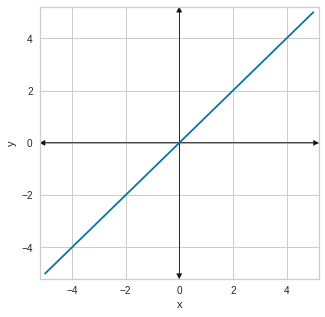

In [5]:
cartesian_plot(X, z)

## Binary Step

for range $\{0,1\}$ and order of continuity $C^{-1}$

$$
    f(z) = \begin{cases}
    0 & \text{if } z < 0\\
    1 & \text{if } z \geq 0
    \end{cases}
$$

### Derivative

$$
    f^\prime(z) = \begin{cases}
    0 & \text{if } z \neq 0\\
    \text{undefined} & \text{if } z = 0
    \end{cases}
$$

Not useful because the derivative is undefined at $z = 0$.

In [6]:
z = [0 if x < 0 else 1 for x in X]

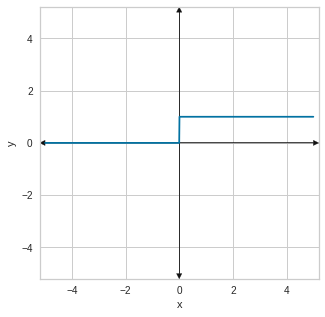

In [7]:
cartesian_plot(X, z)

## Logistic/Sigmoid Function

for range $(0,1)$ and order of continuity $C^\infty$

$$
    f(z) = \frac{1}{1 + e^{-z}}
$$

### Derivative

$$
    f^\prime(z) = f(z)(1 - f(z))
$$

### Multi-Class Classification

**Non-exclusive classes** can have multiple classes assigned to it. **Mutually exclusive classes** can have only one class assigned to it.

Neural networks have one output node per class in multi-class classification. Use **one-hot encoding** of target classes as the ground truth.

Non-exclusive classes use the **sigmoid/logistic** activation function.

In [8]:
z = 1 / (1 + np.exp(-X))

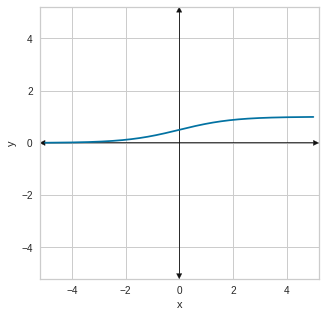

In [9]:
cartesian_plot(X, z)

## Hyperbolic Tangent: $tanh(z)$
$$
    \cosh(z) = \frac{e^z - e^{-z}}{2}
$$

$$
    \sinh(z) = \frac{e^z + e^{-z}}{2}
$$

$$
    f(z) = \tanh(z) = \frac{\sinh(z)}{\cosh(z)} = \frac{e^z - e^{-z}}{e^z + e^{-z}}
$$

for range $(-1, 1)$ and order of continuity $C^\infty$

### Derivative

$$
    f^\prime(z) = 1 - f(z)^2
$$

In [10]:
z = (np.exp(X) - np.exp(-X)) / (np.exp(X) + np.exp(-X))

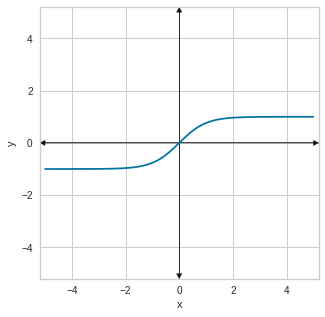

In [11]:
cartesian_plot(X, z)

## Rectified Linear Unit (ReLU)

**ReLU** has been found to have very good performance, especially when dealing with the issue of **vanishing gradients**.

$$
    f(z) = \begin{cases}
    0 & \text{if } z \leq 0\\
    z & \text{if } z > 0\\
    \end{cases}
    = \max\{0,z\} = z1_{z>0}
$$

for range $[0, \infty)$ and order of continuity $C^0$

### Derivative

$$
    f^\prime(z) = \begin{cases}
    0 & \text{if } z < 0\\
    1 & \text{if } z > 0\\
    undefined & \text{if } z = 0
    \end{cases}
$$

In [12]:
z = [0 if x < 0 else x for x in X]

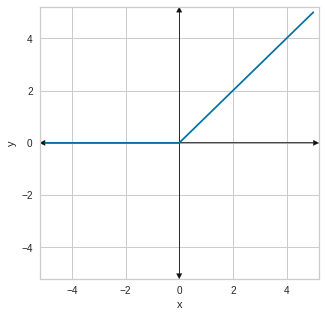

In [13]:
cartesian_plot(X, z)

## Gaussian Error Linear Unit (GELU)

$$
    f(z) = \frac{1}{2}z\left(1 + \text{erf} \left(\frac{z}{\sqrt{2}}\right)\right) = z\Phi(z)
$$

for range $(-0.17\ldots, \infty)$ and order of continuity $C^\infty$

### Derivative

$$
    f^\prime(z) = \Phi(z) + z\phi(z)
$$

In [14]:
z = 0.5 * X * (1 + erf(X / np.sqrt(2)))

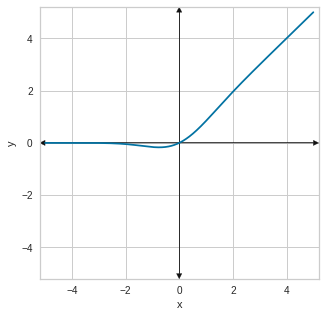

In [15]:
cartesian_plot(X, z)

## Softplus

$$
    f(z) = \ln(1 + e^z)
$$

for range $(0, \infty)$ and order of continuity $C^\infty$

### Derivative

$$
    f^\prime(z) = \frac{1}{1 + e^{-z}}
$$

In [16]:
z = np.log(1 + np.exp(X))

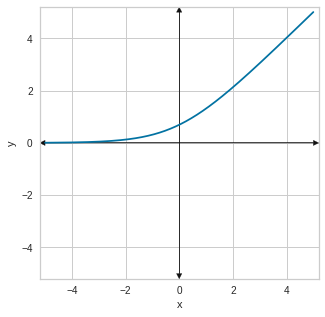

In [17]:
cartesian_plot(X, z)

## Exponential Linear Unit (ELU)

$$
    f(z) = \begin{cases}
    \alpha(e^z -1) & \text{if } z \leq 0\\
    z & \text{if } z > 0
    \end{cases}\\
    \text{with parameter } \alpha
$$

for range $(-\alpha, \infty)$ and order of continuity $\begin{cases}C^1 & \text{if } \alpha=1\\C^0 & otherwise\end{cases}$

### Derivative

$$
    f^\prime(z) = \begin{cases}
    \alpha e^z & \text{if } z < 0\\
    1 & \text{if } z \geq 0\\
    1 & \text{if } z = 0 \text{ and }\alpha = 1
    \end{cases}
$$

In [18]:
a = 2
z = [x if x > 0 else a * (np.exp(x) - 1) for x in X]

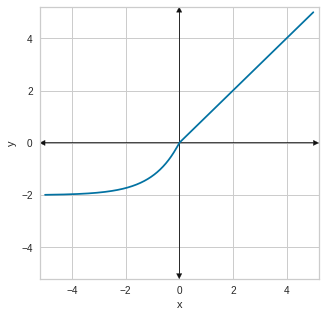

In [19]:
cartesian_plot(X, z)

## Scaled Exponential Linear Unit (SELU)

$$
    f(z) = \lambda\begin{cases}
    \alpha(e^z -1) & \text{if } z < 0\\
    z & \text{if } z \geq 0
    \end{cases}\\
$$

with parameters $\lambda = 1.0507$ and $\alpha = 1.67326$

for range $(-\lambda\alpha,\infty)$ and order of continuity $C^0$

### Derivative

$$
    f^\prime(z) = \lambda\begin{cases}
    \alpha e^z & \text{if } z < 0\\
    1 & \text{if } z \geq 0
    \end{cases}
$$

In [20]:
l = 1.0507
a = 1.67326
z = [x * l if x >= 0 else l * a * (np.exp(x) - 1) for x in X]

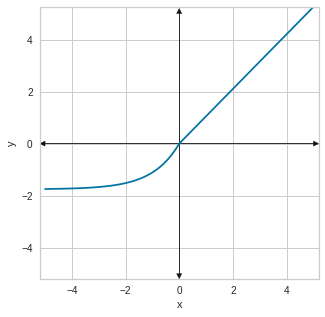

In [21]:
cartesian_plot(X, z)

## Leaky Rectified Linear Unit (Leaky ReLU)

$$
    f(z) = \begin{cases}
    0.01z & \text{if } z < 0\\
    z & \text{if } z \geq 0
    \end{cases}
$$

for range $(-\infty,\infty)$ and order of continuity $C^0$

### Derivative

$$
    f^\prime(z) = \begin{cases}
    0.01 & \text{if } z < 0\\
    1 & \text{if } z \geq 0
    \end{cases}
$$

In [22]:
z = [0.01 * x if x < 0 else x for x in X]

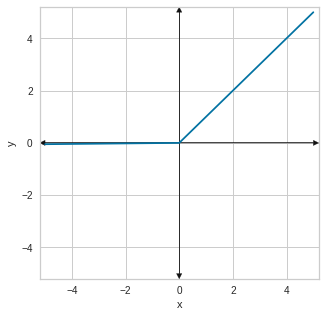

In [23]:
cartesian_plot(X, z)

## Parametric Rectified Linear Unit (PReLU)

$$
    f(z) = \begin{cases}
    \alpha z & \text{if } z < 0\\
    z & \text{if } z \geq 0
    \end{cases}\\
    \text{with parameter } \alpha
$$

for range $(-\infty,\infty)$ and order of continuity $C^0$

### Derivative

$$
    f^\prime(z) = \begin{cases}
    \alpha & \text{if } z < 0\\
    1 & \text{if } z \geq 0
    \end{cases}
$$

In [24]:
a = 0.25
z = [a * x if x < 0 else x for x in X]

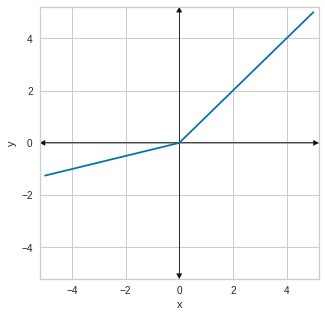

In [25]:
cartesian_plot(X, z)

## Sigmoid Linear Unit (SiLU), Sigmoid Shrinkage, SiL, Swish-1

$$
    f(z) = \frac{z}{1 + e^{-z}}
$$

for range $[-0.278\ldots,\infty)$ and order of continuity $C^\infty$

### Derivative

$$
    f^\prime(z) = \frac{1 = e^{-z} + ze^{-z}}{(1 + e^{-z})^2}
$$

In [26]:
z = X / (1 + np.exp(-X))

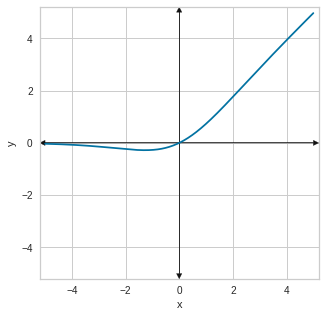

In [27]:
cartesian_plot(X, z)

## Mish

$$
    f(z) = z\tanh(\ln(1 + e^z))
$$

for range $[-0.308\ldots,\infty)$ and order of continuity $C^\infty$

### Derivative

$$
    f^\prime(z) = \frac{(e^z(4e^{2z} + e^{3z} + 4(1 + z) + e^z(6 + 4z)))}{(2 + 2e^z + e^{2z})^2}
$$

In [28]:
z = X * np.tanh(np.log(1 + np.exp(X)))

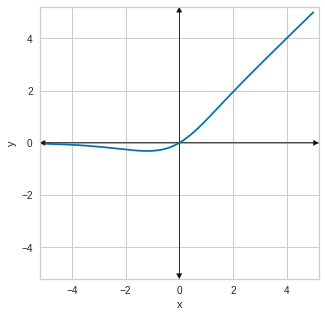

In [29]:
cartesian_plot(X, z)

## Gaussian

$$
    f(z) = e^{-z^2}
$$

for range $(0,1]$ and order of continuity $C^\infty$

## Derivative

$$
    f^\prime(z) = -2ze^{-z^2}
$$

In [30]:
z = np.exp(-np.square(X))

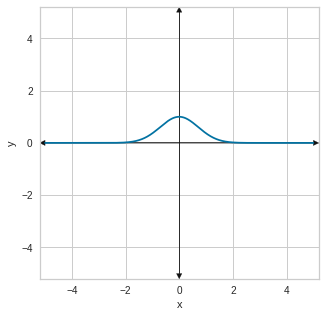

In [31]:
cartesian_plot(X, z)

# Neural Network with Scikit-Learn

In [32]:
data = load_digits()

In [33]:
X = pd.DataFrame(data['data'], columns=data['feature_names']) / 255.0
y = pd.Series(data['target'])

In [34]:
X.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,0.019608,0.050980,0.035294,0.003922,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.023529,0.050980,0.039216,0.000000,0.000000,0.0
1,0.0,0.0,0.000000,0.047059,0.050980,0.019608,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.043137,0.062745,0.039216,0.000000,0.0
2,0.0,0.0,0.000000,0.015686,0.058824,0.047059,0.0,0.0,0.0,0.000000,...,0.019608,0.0,0.0,0.0,0.000000,0.011765,0.043137,0.062745,0.035294,0.0
3,0.0,0.0,0.027451,0.058824,0.050980,0.003922,0.0,0.0,0.0,0.031373,...,0.035294,0.0,0.0,0.0,0.027451,0.050980,0.050980,0.035294,0.000000,0.0
4,0.0,0.0,0.000000,0.003922,0.043137,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.007843,0.062745,0.015686,0.000000,0.0


In [35]:
y.head()

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [37]:
mlp = MLPClassifier(
    activation='relu',
    hidden_layer_sizes=(8,),
    max_iter=2500,
)

mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(8,), max_iter=2500)

In [38]:
y_pred = mlp.predict(X_test)

In [39]:
accuracy_score(y_test, y_pred)

0.9222222222222223

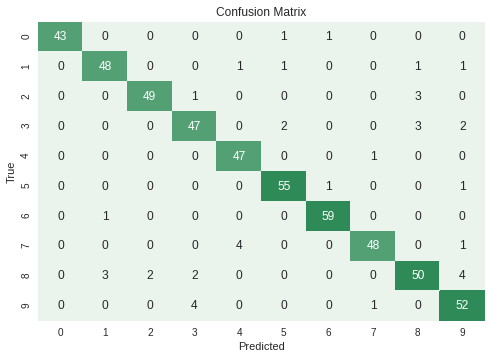

In [40]:
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cbar=False,
    cmap=sns.light_palette('seagreen')
)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        45
           1       0.92      0.92      0.92        52
           2       0.96      0.92      0.94        53
           3       0.87      0.87      0.87        54
           4       0.90      0.98      0.94        48
           5       0.93      0.96      0.95        57
           6       0.97      0.98      0.98        60
           7       0.96      0.91      0.93        53
           8       0.88      0.82      0.85        61
           9       0.85      0.91      0.88        57

    accuracy                           0.92       540
   macro avg       0.92      0.92      0.92       540
weighted avg       0.92      0.92      0.92       540



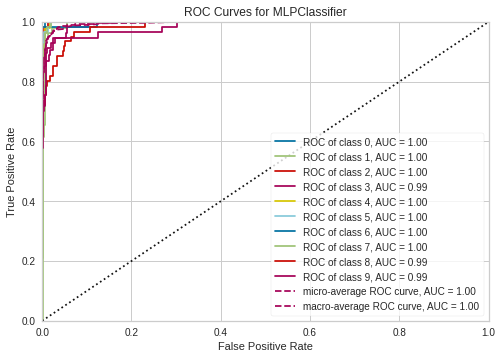

<AxesSubplot:title={'center':'ROC Curves for MLPClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [42]:
viz = ybc.ROCAUC(mlp)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

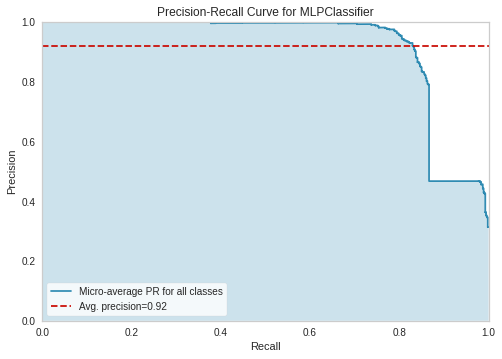

<AxesSubplot:title={'center':'Precision-Recall Curve for MLPClassifier'}, xlabel='Recall', ylabel='Precision'>

In [43]:
viz = ybc.PrecisionRecallCurve(mlp)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

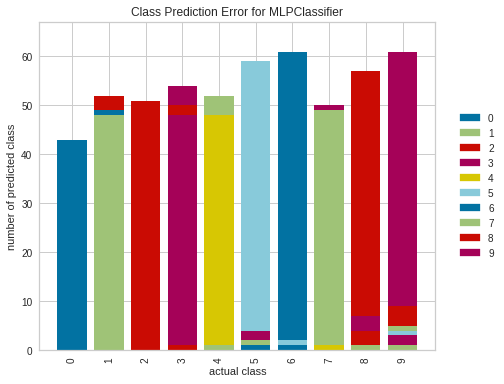

<AxesSubplot:title={'center':'Class Prediction Error for MLPClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [44]:
viz = ybc.ClassPredictionError(mlp)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

# Neural Network with TensorFlow and Keras

In [45]:
model = keras.Sequential([
    keras.layers.InputLayer(64), # Input layer matches MNIST features
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               8320      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 17,226
Trainable params: 17,226
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [48]:
model.fit(X_train, y_train, batch_size=64, epochs=100)

Epoch 1/100
20/20 [==============================] - 0s 1ms/step - loss: 2.2892 - accuracy: 0.2895
Epoch 2/100
20/20 [==============================] - 0s 1ms/step - loss: 2.2335 - accuracy: 0.5169
Epoch 3/100
20/20 [==============================] - 0s 1ms/step - loss: 2.1303 - accuracy: 0.6851
Epoch 4/100
20/20 [==============================] - 0s 1ms/step - loss: 1.9478 - accuracy: 0.7427
Epoch 5/100
20/20 [==============================] - 0s 1ms/step - loss: 1.7124 - accuracy: 0.8188
Epoch 6/100
20/20 [==============================] - 0s 1ms/step - loss: 1.4385 - accuracy: 0.8162
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 1.1651 - accuracy: 0.8295
Epoch 8/100
20/20 [==============================] - 0s 1ms/step - loss: 0.9374 - accuracy: 0.8345
Epoch 9/100
20/20 [==============================] - 0s 1ms/step - loss: 0.7902 - accuracy: 0.8502
Epoch 10/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6774 - accuracy: 0.8674
Epoch 11/

In [49]:
model.history.history

{'loss': [2.2796783447265625,
  2.215855598449707,
  2.099949359893799,
  1.911485195159912,
  1.652888298034668,
  1.3697129487991333,
  1.1149746179580688,
  0.9129725098609924,
  0.7615437507629395,
  0.6510595083236694,
  0.566989004611969,
  0.5015265345573425,
  0.4511234164237976,
  0.4086194932460785,
  0.3740745782852173,
  0.3442421853542328,
  0.31807756423950195,
  0.2972348630428314,
  0.2789309322834015,
  0.26368698477745056,
  0.24860677123069763,
  0.23583078384399414,
  0.2258160263299942,
  0.2155231535434723,
  0.20603519678115845,
  0.20295830070972443,
  0.1913309097290039,
  0.18029683828353882,
  0.17389538884162903,
  0.16737118363380432,
  0.1660636067390442,
  0.15639765560626984,
  0.15161804854869843,
  0.14903931319713593,
  0.1422085464000702,
  0.1372484564781189,
  0.13369517028331757,
  0.12892429530620575,
  0.1290384978055954,
  0.12108499556779861,
  0.12543810904026031,
  0.11852502822875977,
  0.11177201569080353,
  0.11143061518669128,
  0.107775

In [50]:
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

5/5 [==============================] - 0s 3ms/step - loss: 0.1371 - accuracy: 0.9537
test loss, test acc: [0.13711561262607574, 0.9537037014961243]


In [51]:
y_pred = model.predict(X_test)
print("predictions shape:", y_pred.shape)

predictions shape: (540, 10)


In [52]:
accuracy_score(y_test, np.argmax(y_pred, axis=1))

0.9537037037037037

In [53]:
print(classification_report(y_test, np.argmax(y_pred, axis=1)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        45
           1       0.89      0.94      0.92        52
           2       0.98      0.94      0.96        53
           3       0.98      0.96      0.97        54
           4       0.96      1.00      0.98        48
           5       0.95      0.95      0.95        57
           6       0.97      0.98      0.98        60
           7       0.98      0.94      0.96        53
           8       0.95      0.92      0.93        61
           9       0.91      0.93      0.92        57

    accuracy                           0.95       540
   macro avg       0.95      0.95      0.95       540
weighted avg       0.95      0.95      0.95       540



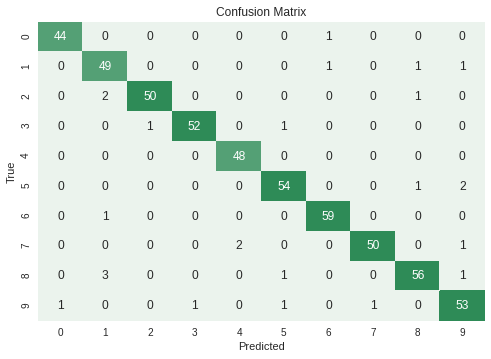

In [54]:
sns.heatmap(
    confusion_matrix(y_test, np.argmax(y_pred, axis=1)),
    annot=True,
    cbar=False,
    cmap=sns.light_palette('seagreen')
)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()